In [1]:
import pandas as pd
import numpy as np

# Membuat DataFrame contoh
np.random.seed(42)
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100) * 100,
    'target': np.random.randint(0, 2, 100)
})

# Lihat beberapa baris pertama
print(data.head())


   feature1   feature2  target
0  0.374540   3.142919       1
1  0.950714  63.641041       1
2  0.731994  31.435598       0
3  0.598658  50.857069       0
4  0.156019  90.756647       1


In [2]:
# Statistik dasar
print(data.describe())

# Informasi kolom dan tipe data
print(data.info())

# Cek nilai yang hilang
print(data.isnull().sum())


         feature1    feature2  target
count  100.000000  100.000000  100.00
mean     0.470181   49.783172    0.55
std      0.297489   29.311125    0.50
min      0.005522    0.695213    0.00
25%      0.193201   24.200453    0.00
50%      0.464142   50.562486    1.00
75%      0.730203   76.618360    1.00
max      0.986887   98.565045    1.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  100 non-null    float64
 1   feature2  100 non-null    float64
 2   target    100 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 2.1 KB
None
feature1    0
feature2    0
target      0
dtype: int64


In [3]:
# Normalisasi data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['feature1', 'feature2']] = scaler.fit_transform(data[['feature1', 'feature2']])

# Lihat beberapa baris setelah normalisasi
print(data.head())


   feature1  feature2  target
0 -0.323112 -1.599230       1
1  1.623434  0.475167       1
2  0.884509 -0.629113       0
3  0.434049  0.036822       0
4 -1.061365  1.404924       1


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


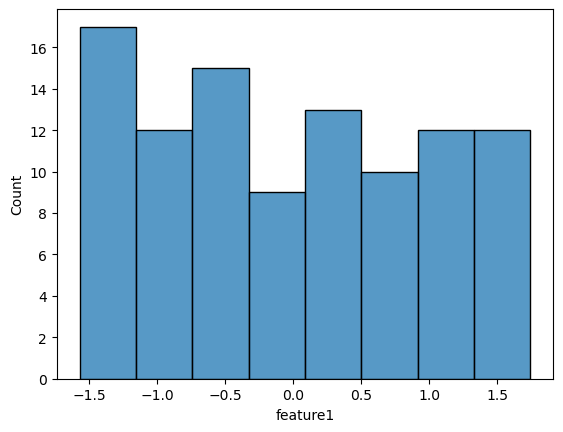

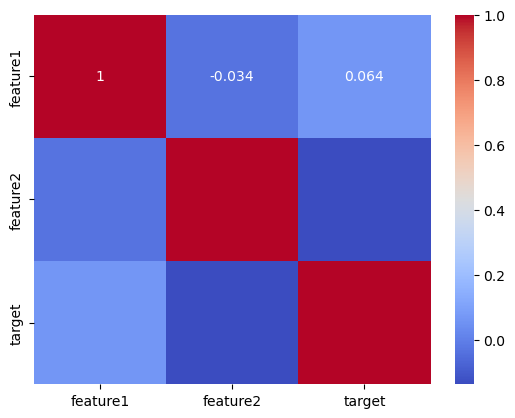

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
sns.histplot(data['feature1'])
plt.show()

# Plot korelasi
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Pisahkan fitur dan target
X = data[['feature1', 'feature2']]
y = data['target']

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.25064324564549445


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Pisahkan fitur dan target
X = data[['feature1', 'feature2']]
y = data['target']

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.65


In [7]:
from sklearn.model_selection import GridSearchCV

# Contoh tuning parameter dengan GridSearchCV
param_grid = {'max_depth': [3, 5, 7, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


{'max_depth': 3}
